In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
txt = pd.read_table('people.txt')
txt

,AGE,AGEGROUP,HEIGHT,STATUS,YEARSMARRIED
0,21,ADULT,6.0,SINGLE,-1
1,2,CHILD,3.0,MARRIED,0
2,18,ADULT,5.7,MARRIED,20
3,221,ELDERLY,5.0,WIDOWED,2
4,34,CHILD,-7.0,MARRIED,3


In [3]:
df=pd.DataFrame()
def E(txt):
    iage=txt.index[(txt['AGE']<0)|(txt['AGE']>150)].tolist()
    iyrm=txt.index[(txt['AGE']<txt['YEARSMARRIED'])].tolist()
    istat = txt.index[(txt['STATUS']!="SINGLE") & (txt['STATUS']!="WIDOWED") & (txt['STATUS']!="MARRIED") ].tolist()
    ig1 = txt.index[(txt['AGE']<18)&(txt['AGEGROUP']!='CHILD')].tolist()
    ig2 = txt.index[((txt['AGE']>17))&(txt['AGE']<65)&(txt['AGEGROUP']!='ADULT')].tolist()
    ig3 = txt.index[(txt['AGE']>65)&(txt['AGEGROUP']!='ELDERLY')].tolist()
    for i in range(0,len(iage)):
        print("Age is wrong at index ",int(iage[i]),"\n")
    for i in range(0,len(iyrm)):
        print("Age is lower than year married at index ",int(iyrm[i]),"\n")
    for i in range(0,len(istat)):
        print("Status is wrong at index ",int(istat[i]),"\n")
        
    tin = pd.unique(iage+iyrm+ig1+istat+ig2+ig3).tolist()
    return tin,len(iage),len(iyrm),len(istat),len(ig1+ig2+ig3)

tin,r1,r2,r3,r4=E(txt)
txt.iloc[tin]

Age is wrong at index  3 

Age is lower than year married at index  2 



,AGE,AGEGROUP,HEIGHT,STATUS,YEARSMARRIED
3,221,ELDERLY,5.0,WIDOWED,2
2,18,ADULT,5.7,MARRIED,20
4,34,CHILD,-7.0,MARRIED,3


In [4]:
print("Rule 1 is broken ",r1," times")
print("Rule 2 is broken ",r2," times")
print("Rule 3 is broken ",r3," times")
print("Rule 4 is broken ",r4," times\n")
print("Total rules are broken ",r1+r2+r3+r4," times")

Rule 1 is broken  1  times
Rule 2 is broken  1  times
Rule 3 is broken  0  times
Rule 4 is broken  1  times

Total rules are broken  3  times


[]

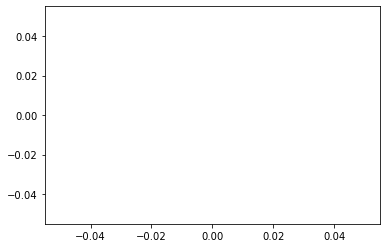

In [5]:
pl = pd.DataFrame({'Rules':[r1,r2,r3,r4]})
plt.plot()